<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 1463
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Month                    1442 non-null   int64   
 1   Day                      1442 non-null   int64   
 2   Hour                     1442 non-null   int64   
 3   Sammonpuistikko          1442 non-null   float64 
 4   Hietaniemenkatu          955 non-null    float64 
 5   Eteläinen Hesperiankatu  1442 non-null   float64 
 6   Kesäkatu                 1442 non-null   float64 
 7   row                      1442 non-null   int64   
 8   clouds (1/8)             1442 non-null   int64   
 9   relative humidity (%)    1442 non-null   int64   
 10  rain intensity (mm/h)    1442 non-null   float64 
 11  air temperature (degC)   1442 non-null   float64 
 12  _merge                   1442 non-null   category
dtypes: category(1), float64(6), int64(6)
memory usage: 148.0 KB


NameError: name 'MaxNLocator' is not defined

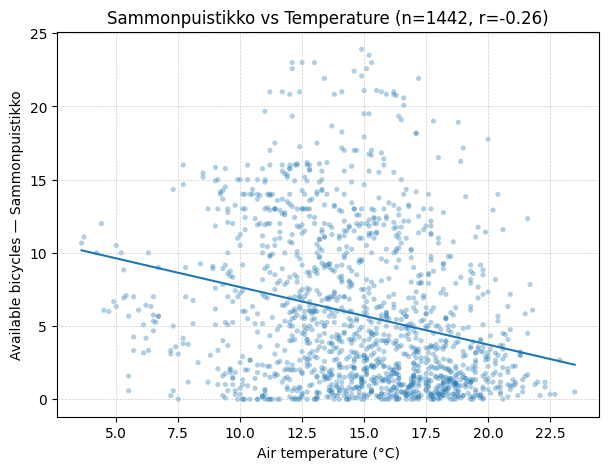

In [ ]:
import csv
import matplotlib.pyplot as plt
import pandas as pd


# Load input CSV data related to public city bicycles into pandas DataFrame
df_bicycles = pd.read_csv("exrc03p01_bicycles.csv")

# # Get basic information about data
# df_bicycles.info() # prints concise summary about DataFrame's structure
# print(df_bicycles.head()) # prints first five rows - default

# '''
# Bicycles data observations
# total 1442 rows 
# No Null values for Month, Day and Hour columns, all are types on integer
# No Null value for Sammonpuistikko city data
# '''

# Load input CSV data related to hourly weather observations into pandas DataFrame
df_weather = pd.read_csv("exrc03p01_weather.csv")

# # Get basic information about data
# df_weather.info() # prints concise summary about DataFrame's structure
# print(df_weather.head()) # prints first five rows - default

'''
Weather data observations
total 1464 rows 
No Null values for month, day, time
month and day coloumns values are integers
time column values are object type
'''

# Convert the 'Time' column value to int format
df_weather["time"] = df_weather["time"].str.split(":").str[0].astype(int)

# # Print sample weather data for debugging
# df_weather.info() # prints concise summary about DataFrame's structure
# print(df_weather.head()) # prints first five rows - default

# # Print Column names of both DataFrames to indentify merging columns
# print("Columns in df_bicycles DataFrame:", df_bicycles.columns)
# print("Columns in df_weather DataFrame:", df_weather.columns)

# Rename coloumn names for df_weather to perform operation
df_weather = df_weather.rename(columns={"month":"Month", "day":"Day", "time":"Hour"})

# # Print column names for debugging
# print("Columns in df_bicycles DataFrame post processing:", df_bicycles.columns)
# print("Columns in df_weather DataFrame post processing:", df_weather.columns)


# Merge dataframes df_bicyles and df_weather
# Used Pandas DataFrame method ´merge()' combine the data
# ´on´ paramter used to provide on which column/s merge to be performed
# ´how´ parameter used to provide yype of merge to be performed. Used 'outer' to write data from both DataFrames (ie union)
# ´índicator´ parameter set to 'True' to add a column to the output DataFrame called “_merge” with information on the source of each row
df_merged = pd.merge(df_bicycles, df_weather, on=["Month", "Day", "Hour"], how="outer", indicator = True )

# # Print sample for debugging
# df_merged.info()
# print(df_merged.head())
# print(df_merged.tail())
# print(df_merged.columns)

# df_merged.to_csv("exrc_03_merged_output.csv", index=False)

# remove any row where column 'a' OR 'b' is NaN
# Used pand method dropna() with subset parameter where concerned cols provided
df_cleaned = df_merged.dropna(subset=['Sammonpuistikko', 'air temperature (degC)'])


# Print sample for debugging post removing the NaN entries
df_cleaned.info()

# plt.figure(figsize=(6,4))
plt.scatter(df_cleaned["air temperature (degC)"], df_cleaned["Sammonpuistikko"])
plt.xlabel("Temperature")
plt.ylabel("No of Bicycles")
plt.title("Scatter")
